In [1]:
# Importar las librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el csv
df_accidentes = pd.read_csv("accidentes_2.csv")

In [3]:
df_accidentes.head()

,id,fecha,franja_hora,n_victimas,gravedad,sexo,edad,vehiculo_1,vehiculo_2,direccion_normalizada,tipo_calle,comuna,latitud,longitud
0,2016-0001,2016-01-01,4,1,FATAL,M,19,MOTO,AUTO,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",AVENIDA,8,-34.68757022,-58.47533969
1,2016-0002,2016-01-02,1,1,FATAL,M,70,AUTO,PASAJEROS,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",GRAL PAZ,9,-34.66977709,-58.50877521
2,2016-0003,2016-01-03,7,1,FATAL,M,30,MOTO,AUTO,ENTRE RIOS AV. 2034,AVENIDA,1,-34.63189362,-58.39040293
3,2016-0004,2016-01-10,0,1,LEVE - SIN LESIONES,M,18,MOTO,SD,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",AVENIDA,8,-34.68092974,-58.46503904
4,2016-0005,2016-01-21,5,1,FATAL,M,29,MOTO,PASAJEROS,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",AVENIDA,1,-34.62246630,-58.38718297


### Comienzo con la revisión de las variables de forma independiente para luego analizar en conjunto:

#### Gravedad

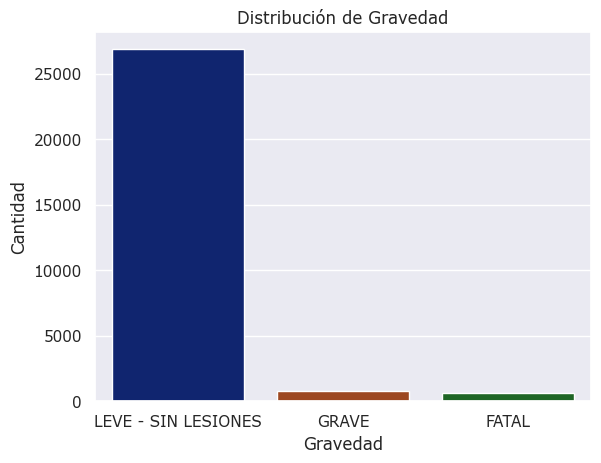

In [13]:
sns.set_theme(style="darkgrid",palette='dark',font="Verdana",font_scale=1)
sns.barplot(x=df_accidentes["gravedad"].value_counts().index,y=df_accidentes["gravedad"].value_counts(), hue=df_accidentes["gravedad"].value_counts().index)
plt.title('Distribución de Gravedad')
plt.xlabel('Gravedad')
plt.ylabel("Cantidad")
plt.show()

Lógicamente, la cantidad de accidentes con heridas leves o sin lesiones es muy superior a la de graves o con fallecidos. Incluso siendo que el dataset de casos fatales abarca un período de tiempo dos veces mayor.

#### Distribución Horaria

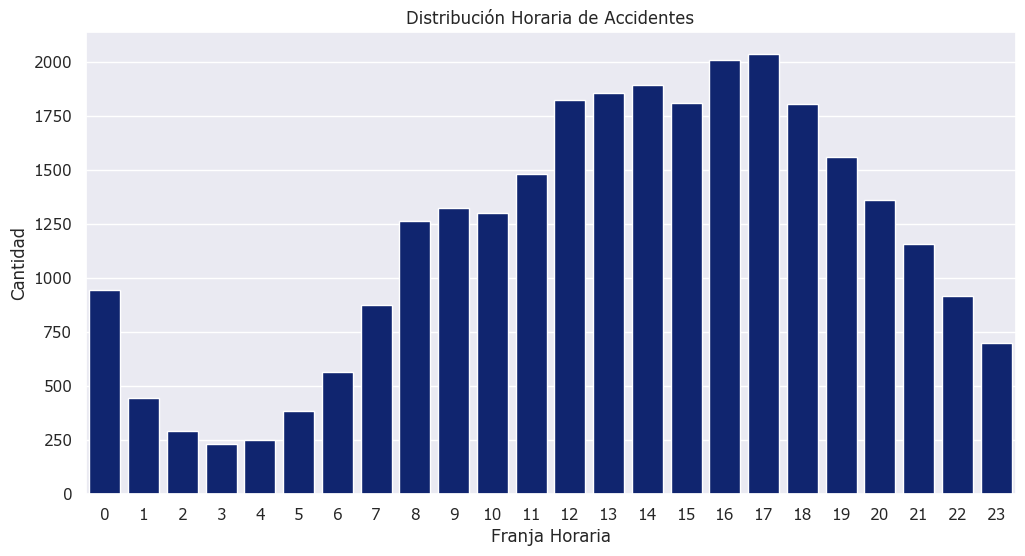

In [16]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='dark',font="Verdana",font_scale=1)
sns.barplot(x=df_accidentes["franja_hora"].value_counts().index,y=df_accidentes["franja_hora"].value_counts())
plt.title('Distribución Horaria de Accidentes')
plt.xlabel('Franja Horaria')
plt.ylabel("Cantidad")
plt.show()

Se observa un aumento paulatino de los accidentes en las horas diurnas, con un pico entre las 16 y las 17 horas, que coincide con en fin de la jornada laboral. Durante la noche el número de accidentes va disminuyendo, alcanzando los valores mínimos entre la 1 y las 5 de la madrugada.

#### Sexo

In [25]:
total = df_accidentes.__len__()
hombres = df_accidentes["sexo"].value_counts()[0]
mujeres = df_accidentes["sexo"].value_counts()[1]
print(hombres*100/total)
print(mujeres*100/total)

68.85749602684089
31.1425039731591


C:\Users\Usuario\AppData\Local\Temp\ipykernel_15300\2012252851.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hombres = df_accidentes["sexo"].value_counts()[0]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_15300\2012252851.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mujeres = df_accidentes["sexo"].value_counts()[1]


<Figure size 600x600 with 0 Axes>

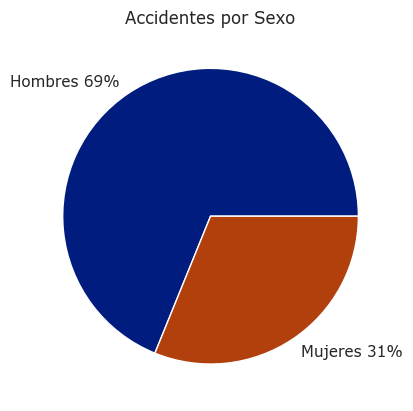

In [26]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid",palette='dark',font="Verdana",font_scale=1)
fig, ax = plt.subplots()
ax.pie(df_accidentes["sexo"].value_counts(), labels=["Hombres 69%", "Mujeres 31%"])
plt.title('Accidentes por Sexo')
plt.show()

Este gráfico solo permite una interpretación literal, sobre que hay más accidentados hombres que mujeres.

#### Edad

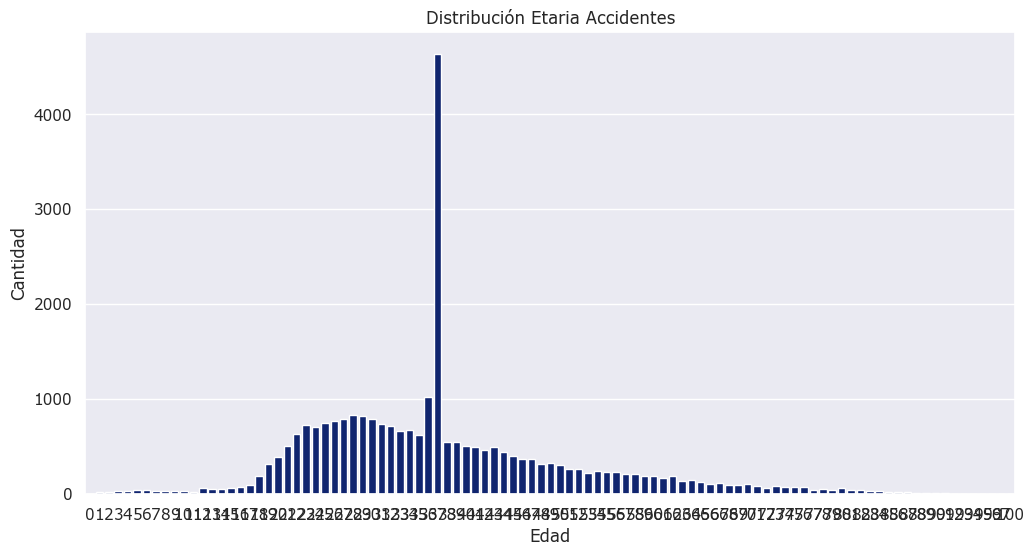

In [27]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='dark',font="Verdana",font_scale=1)
sns.barplot(x=df_accidentes["edad"].value_counts().index,y=df_accidentes["edad"].value_counts())
plt.title('Distribución Etaria Accidentes')
plt.xlabel('Edad')
plt.ylabel("Cantidad")
plt.show()

Conclusión del gráfico

#### Vehículos

In [30]:
vehiculo_1 = df_accidentes["vehiculo_1"].value_counts()
vehiculo_2 = df_accidentes["vehiculo_2"].value_counts()

In [32]:
vehiculo_1.keys()

Index(['MOTO', 'SD', 'AUTO', 'CICLISTA', 'PEATON', 'TRANSPORTE PUBLICO',
       'CAMION', 'TAXI', 'UTILITARIO', 'MOVIL', 'MIXTO', 'CAMIONETA',
       'BICICLETA', 'MONOPATIN', 'OTRO', 'CARGAS', 'PASAJEROS'],
      dtype='object', name='vehiculo_1')

<Figure size 600x600 with 0 Axes>

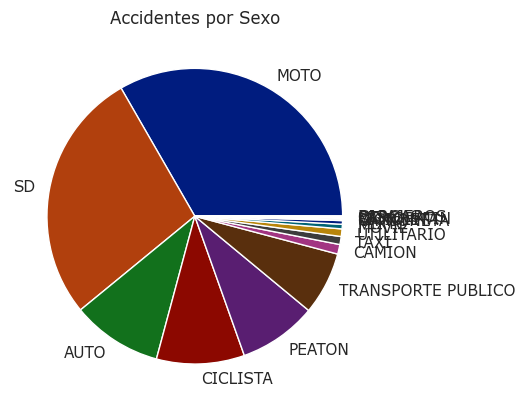

In [33]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid",palette='dark',font="Verdana",font_scale=1)
fig, ax = plt.subplots()
ax.pie(vehiculo_1, labels=vehiculo_1.keys())
plt.title('Accidentes por Sexo')
plt.show()

Conclusión del gráfico

#### Tipo de Calle

<Figure size 600x600 with 0 Axes>

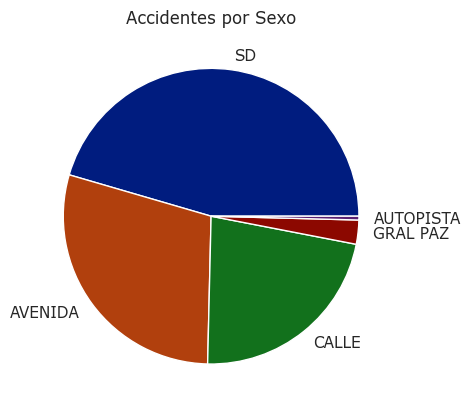

In [36]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid",palette='dark',font="Verdana",font_scale=1)
fig, ax = plt.subplots()
ax.pie(df_accidentes["tipo_calle"].value_counts(), labels=df_accidentes["tipo_calle"].value_counts().index)
plt.title('Accidentes por Sexo')
plt.show()

Conclusión del gráfico

#### Comuna

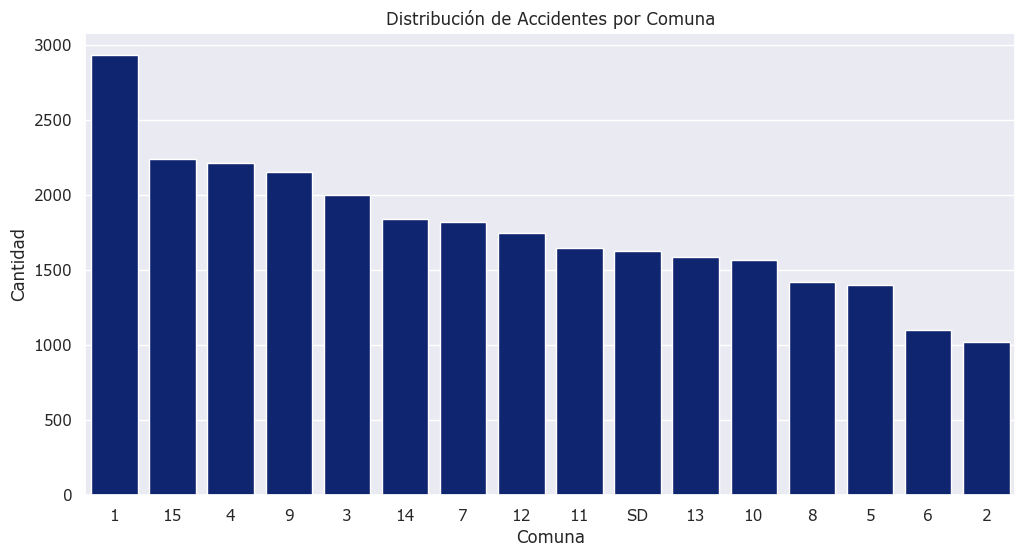

In [38]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='dark',font="Verdana",font_scale=1)
sns.barplot(x=df_accidentes["comuna"].value_counts().index, y=df_accidentes["comuna"].value_counts())
plt.title('Distribución de Accidentes por Comuna')
plt.xlabel('Comuna')
plt.ylabel("Cantidad")
plt.show()

La distribución por comuna es bastante homogenea. Se observa un valor particularmente alto en la comuna uno y valores un poco bajos en las comunas 6 y 2. Voy a revisar si hay relación lógica entre el tamaño de la comuna y la cantidad de accidentes, o se trata de causas que requieren un análisis más profundo.

### Análisis de las variables en conjunto: